# Week 7 - Function and Loop Attempt #45,237

## Carolyn Chu and Leslie Velasquez

Hitting a wall with this function and loop stuff!!!

### Import Libraries and Data

In [1]:
# import libraries
import pandas as pd                      # for data wrangling
import geopandas as gpd                  # for analyzing spatial data
import contextily as ctx                 # for base maps
import matplotlib.pyplot as plt          # for plotting data
import plotly.express as px              # for interactive plots

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Import Parks Data

In [2]:
#pull the parks data directly from the website link
parks = gpd.read_file("https://data.lacity.org/api/geospatial/rwq7-yhp5?method=export&format=GeoJSON")

In [3]:
# explore the geodataframe more generally
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        561 non-null    object  
 1   shape_area  561 non-null    object  
 2   objectid    561 non-null    object  
 3   park_id     561 non-null    object  
 4   name_alpha  561 non-null    object  
 5   shape_leng  561 non-null    object  
 6   area_acres  561 non-null    object  
 7   issubpark   561 non-null    object  
 8   region      561 non-null    object  
 9   address     561 non-null    object  
 10  name_publi  330 non-null    object  
 11  park_class  561 non-null    object  
 12  cd_real     561 non-null    object  
 13  geometry    561 non-null    geometry
dtypes: geometry(1), object(13)
memory usage: 61.5+ KB


In [4]:
# look at first 5 rows
parks.head()

name     shape_area objectid park_id  \
0  Robert F Kennedy Inspiration Memorial Park  6501.37488025        1    1056   
1                         Sycamore Grove Park  691462.199493        2     736   
2                      San Pedro Welcome Park  17402.1579777        3     328   
3                  Country Club Heritage Park  3647.84860118        4    1045   
4                     Watts Cultural Crescent  128793.355722        5    1046   

                          name_alpha     shape_leng       area_acres  \
0  ROBERT F KENNEDY PARK (LAUSD) JUA   641.47054538   0.149251627315   
1                SYCAMORE GROVE PARK   6227.3991903    15.8738513625   
2             SAN PEDRO WELCOME PARK  560.372862441   0.399500174163   
3   COUNTRY CLUB PARK HERITAGE PLAZA  287.523337381  0.0837434158085   
4            WATTS CULTURAL CRESCENT  2852.11033344    2.95670043382   

  issubpark region                           address  \
0         N      M    3400 W Wilshire Blvd, LA 90010   
1         N      M      4702 N Figueroa St, LA 90042   
2         N      P  451 N Gaffey St, San Pedro 90731   
3         N      M        1015 S Wilton Pl, LA 90018   
4         N      P   1780 E Santa Ana Blvd, LA 90002   

                                          name_publi park_class cd_real  \
0  Kennedy (Robert F) Inspiration Memorial Park (...          N      10   
1                                Sycamore Grove Park          C      01   
2                              Formerly Welcome Park          N      15   
3                              AKA Wilton Place Park          N      10   
4                  AKA Watts Towers Cultural Cresent          N      15   

                                            geometry  
0  MULTIPOLYGON (((-118.29796 34.06162, -118.2969...  
1  MULTIPOLYGON (((-118.20110 34.10134, -118.2011...  
2  MULTIPOLYGON (((-118.29286 33.74600, -118.2928...  
3  MULTIPOLYGON (((-118.31504 34.05232, -118.3149...  
4  MULTIPOLYGON (((-118.24221 33.93945, -118.2422...

In [5]:
# look at last 5 rows
parks.tail()

name     shape_area  \
556                         Los Angeles River Greenway   132354.80071   
557                     South Palos Verdes Street Park  17682.6918121   
558                               Sunnynook River Park  41685.1517063   
559                         Los Angeles River Greenway  1342.83912884   
560  Los Angeles River Greenway / Elysian Valley Bi...  210126.738804   

    objectid park_id                                         name_alpha  \
556      558    1137  LOS ANGELES RIVER GREENWAY - LAUREL CANYON TO ...   
557      568    1115                     SOUTH PALOS VERDES STREET PARK   
558      579    1093                               SUNNYNOOK RIVER PARK   
559      580    1138                      LAURELGROVE PEDESTRIAN BRIDGE   
560      582    1116  LOS ANGELES RIVER GREENWAY / ELYSIAN VALLEY BI...   

        shape_leng       area_acres issubpark region  \
556  6045.51423906    3.03846028767         Y      V   
557  548.042636013   0.405940370594         N      P   
558  1777.67071108   0.956963233412         Y      M   
559  332.093587483  0.0308274678654         Y      V   
560  27587.8415216    4.82386545715         Y      M   

                                               address  \
556    12305 W Valleyheart Dr South, Studio City 91604   
557                   200-220 S Palos Verdes St, 90731   
558                     2901 N Glendale Blvd, LA 90039   
559    12305 W Valleyheart Dr South, Studio City 91604   
560  Los Angeles River West bank from N Fletcher Dr...   

                                            name_publi park_class cd_real  \
556                                               None          R      02   
557   South Palos Verdes Street Park, Community Garden          N      15   
558                               Sunnynook River Park          R      04   
559  LOS ANGELES RIVER GREENWAY - LAURELGROVE PEDES...          R      02   
560  Los Angeles River Greenway / Elysian Valley Bi...          R      13   

                                              geometry  
556  MULTIPOLYGON (((-118.39719 34.14454, -118.3972...  
557  MULTIPOLYGON (((-118.28107 33.74228, -118.2809...  
558  MULTIPOLYGON (((-118.26586 34.11353, -118.2659...  
559  MULTIPOLYGON (((-118.40091 34.14380, -118.4009...  
560  MULTIPOLYGON (((-118.24294 34.10337, -118.2429...

## Plot it!

In [6]:
#reproject the dataframe
parks_mercator = parks.to_crs(epsg=3857)

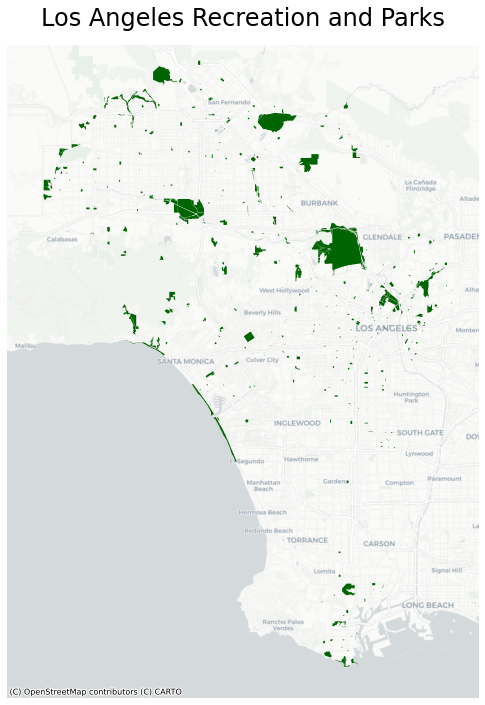

In [7]:
fig, ax = plt.subplots(figsize=(12,12))

# add the layer with ax=ax in the argument 
parks_mercator.plot(ax=ax,
                    color="darkgreen"
                   )

# turn the axis off but set custom axes
ax.axis('off')
ax.set_ylim([3985000, 4075000])
ax.set_xlim([-13215000, -13150000])

# set a title
ax.set_title('Los Angeles Recreation and Parks',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

### Centroid - Part of Function and Loop Attempt #3,325

In [8]:
parks = parks.to_crs(epsg=2263)
parks['centroid'] = parks.centroid
parks = parks.to_crs(epsg=4326)
parks['centroid'] = parks['centroid'].to_crs(epsg=4326)

In [9]:
parks.head()

name     shape_area objectid park_id  \
0  Robert F Kennedy Inspiration Memorial Park  6501.37488025        1    1056   
1                         Sycamore Grove Park  691462.199493        2     736   
2                      San Pedro Welcome Park  17402.1579777        3     328   
3                  Country Club Heritage Park  3647.84860118        4    1045   
4                     Watts Cultural Crescent  128793.355722        5    1046   

                          name_alpha     shape_leng       area_acres  \
0  ROBERT F KENNEDY PARK (LAUSD) JUA   641.47054538   0.149251627315   
1                SYCAMORE GROVE PARK   6227.3991903    15.8738513625   
2             SAN PEDRO WELCOME PARK  560.372862441   0.399500174163   
3   COUNTRY CLUB PARK HERITAGE PLAZA  287.523337381  0.0837434158085   
4            WATTS CULTURAL CRESCENT  2852.11033344    2.95670043382   

  issubpark region                           address  \
0         N      M    3400 W Wilshire Blvd, LA 90010   
1         N      M      4702 N Figueroa St, LA 90042   
2         N      P  451 N Gaffey St, San Pedro 90731   
3         N      M        1015 S Wilton Pl, LA 90018   
4         N      P   1780 E Santa Ana Blvd, LA 90002   

                                          name_publi park_class cd_real  \
0  Kennedy (Robert F) Inspiration Memorial Park (...          N      10   
1                                Sycamore Grove Park          C      01   
2                              Formerly Welcome Park          N      15   
3                              AKA Wilton Place Park          N      10   
4                  AKA Watts Towers Cultural Cresent          N      15   

                                            geometry  \
0  MULTIPOLYGON (((-118.29796 34.06162, -118.2969...   
1  MULTIPOLYGON (((-118.20110 34.10134, -118.2011...   
2  MULTIPOLYGON (((-118.29286 33.74600, -118.2928...   
3  MULTIPOLYGON (((-118.31504 34.05232, -118.3149...   
4  MULTIPOLYGON (((-118.24221 33.93945, -118.2422...   

                      centroid  
0  POINT (-118.29749 34.06159)  
1  POINT (-118.20301 34.10007)  
2  POINT (-118.29264 33.74621)  
3  POINT (-118.31481 34.05236)  
4  POINT (-118.24096 33.93896)

# I feel like I'm so close...

to throwing my computer out the window.

In [10]:
parks.cd_real.unique().tolist()

['10',
 '01',
 '15',
 '09',
 '11',
 '06',
 '04',
 '13',
 '14',
 '07',
 '08',
 '12',
 '03',
 '05',
 '02',
 '99']

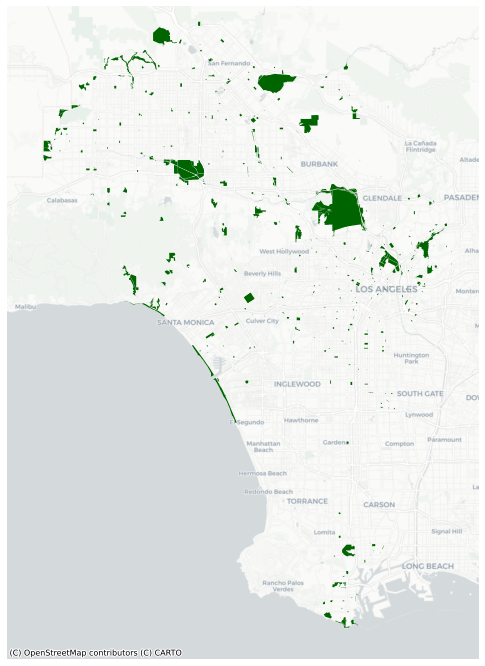

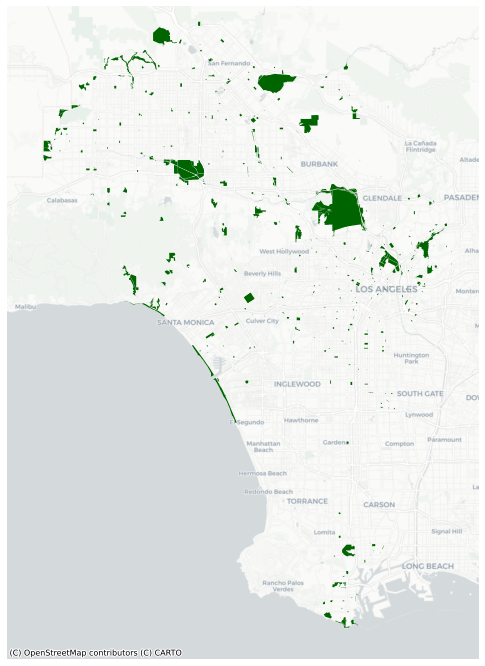

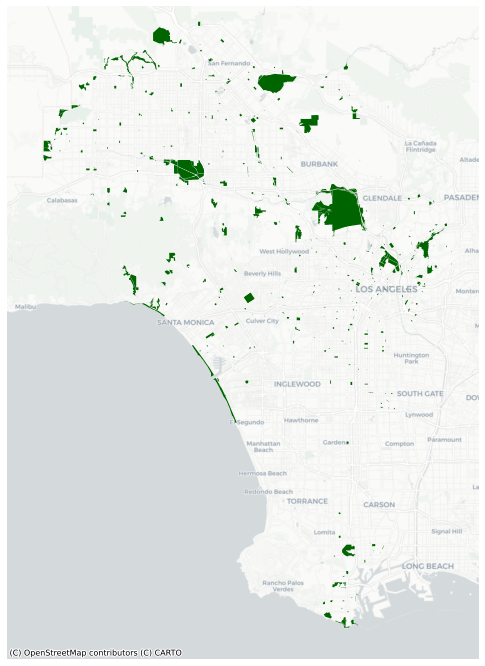

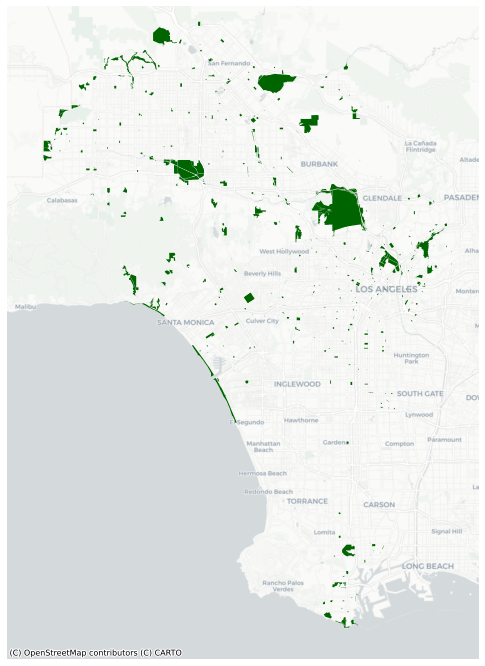

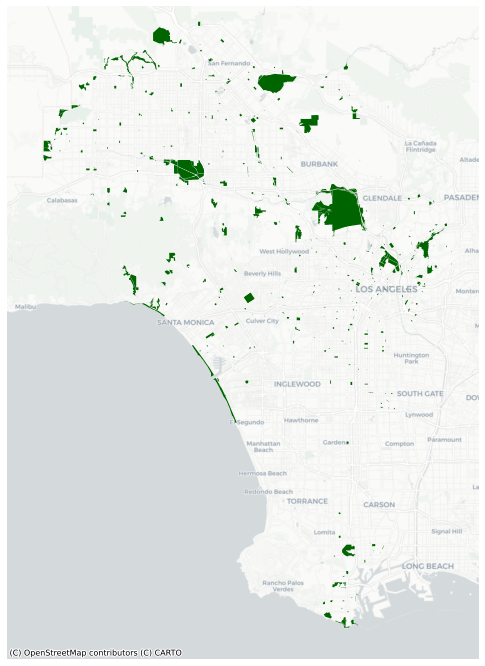

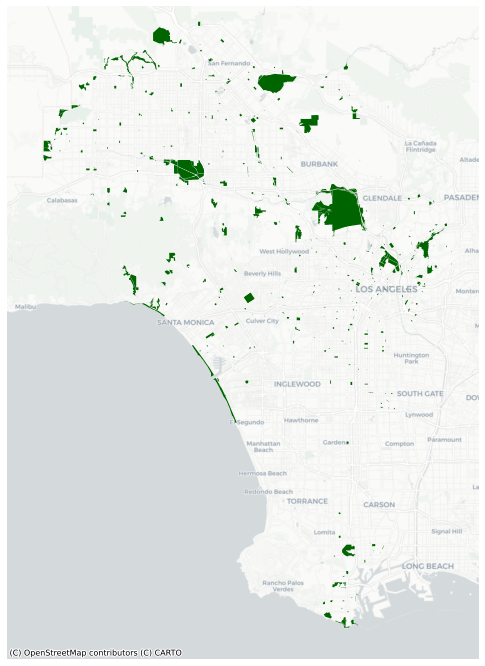

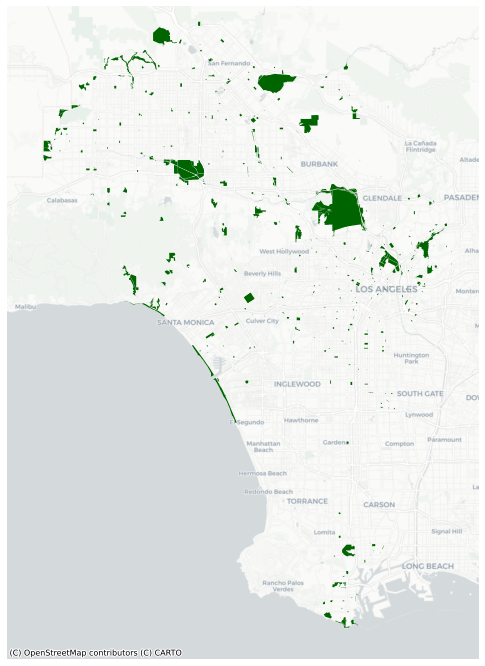

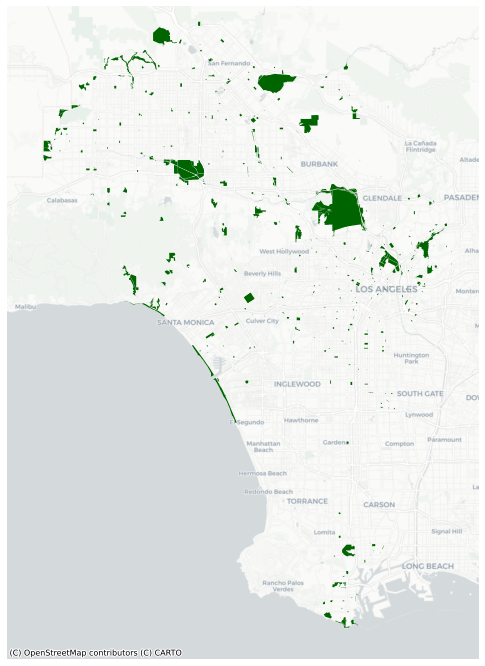

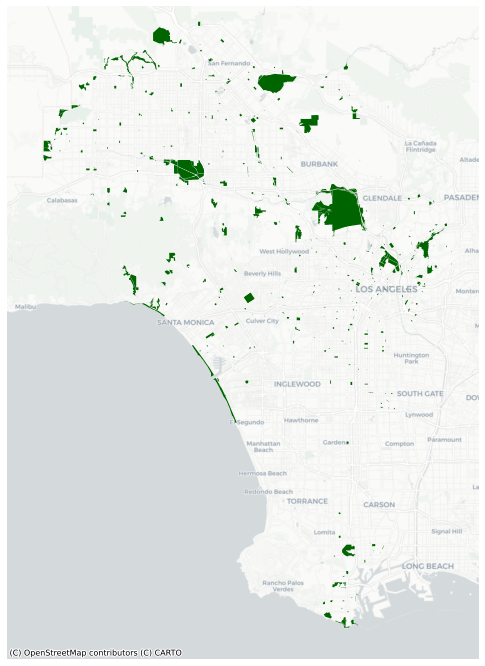

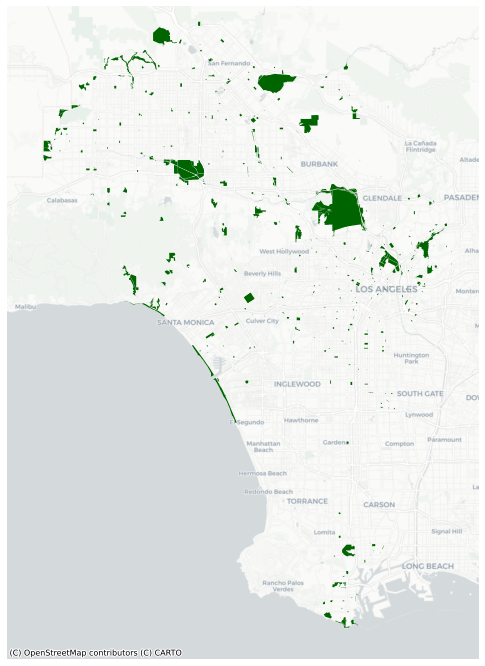

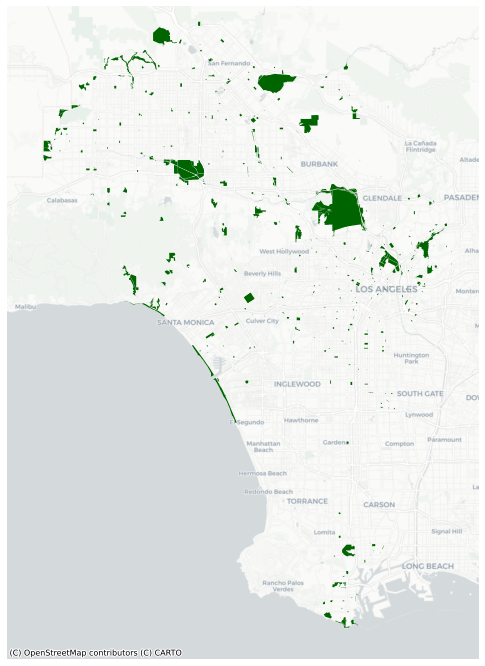

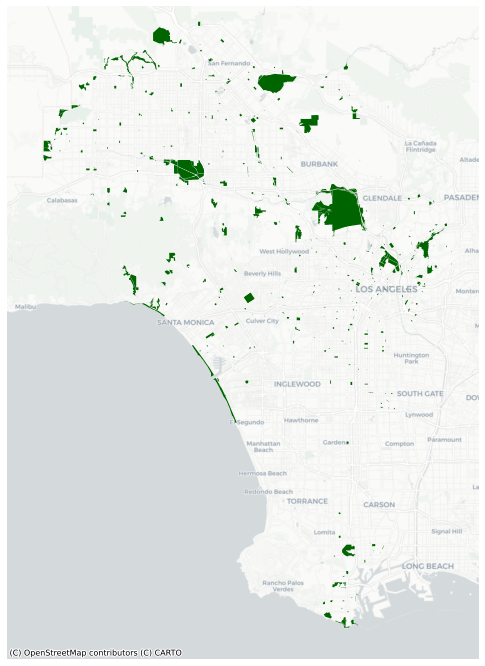

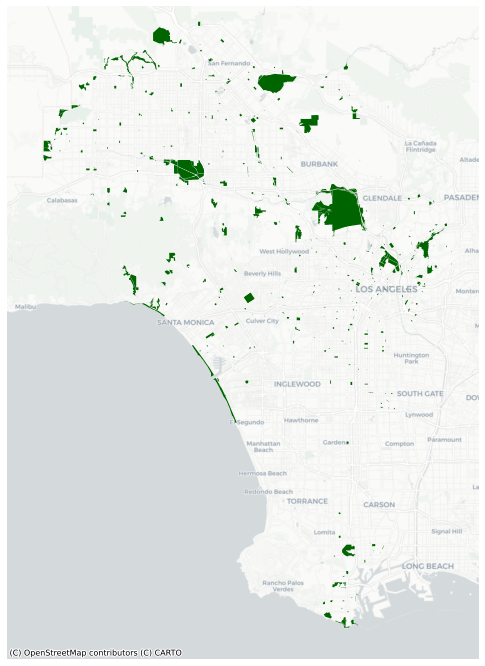

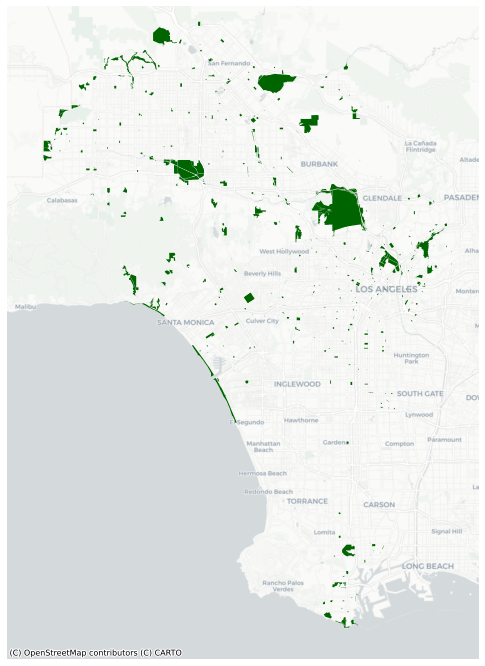

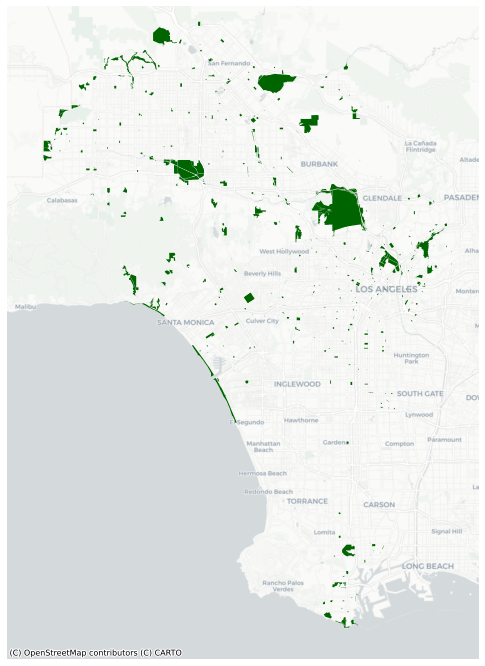

In [11]:
def parks_by_district(councildistrict):
    fig, ax = plt.subplots(figsize=(12,12))

    # add the layer with ax=ax in the argument 
    parks_mercator.plot(ax=ax,
                        color="darkgreen"
                       )

    # turn the axis off but set custom axes
    ax.axis('off')
    ax.set_ylim([3985000, 4075000])
    ax.set_xlim([-13215000, -13150000])
    
    # add a basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
# list of districts
districts = ['10','01','15','09','11','06','04','13','14','07','08','12','03','05','02']

for district in districts:
    parks_by_district(councildistrict=district)

# Attempt #84
"The Black and Red Series"

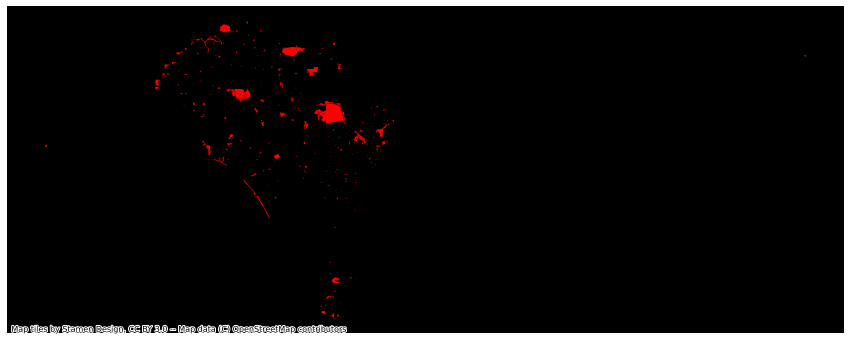

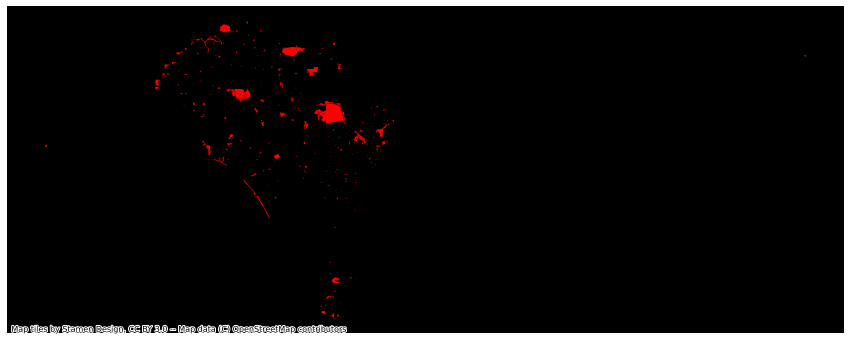

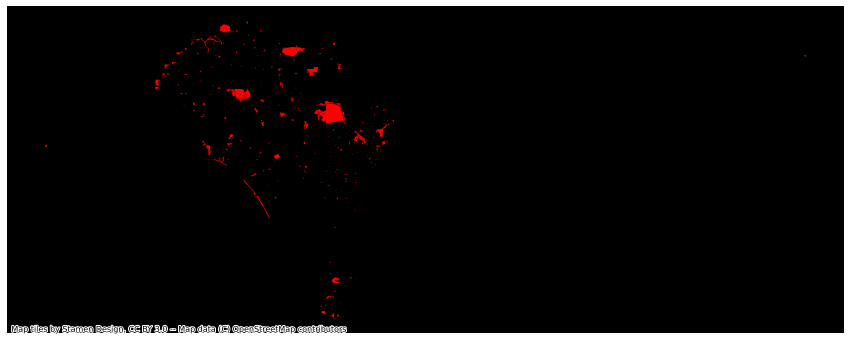

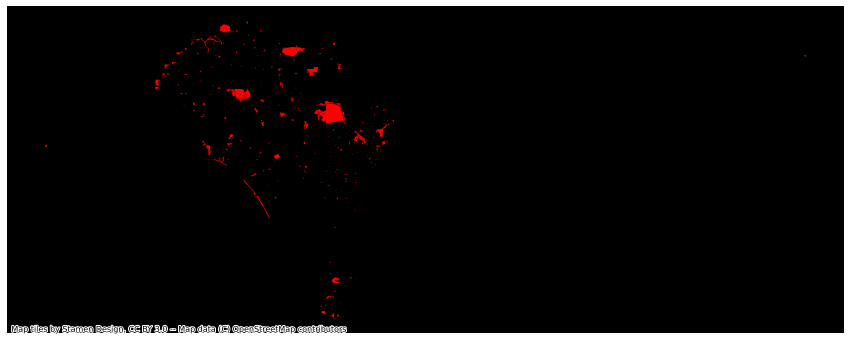

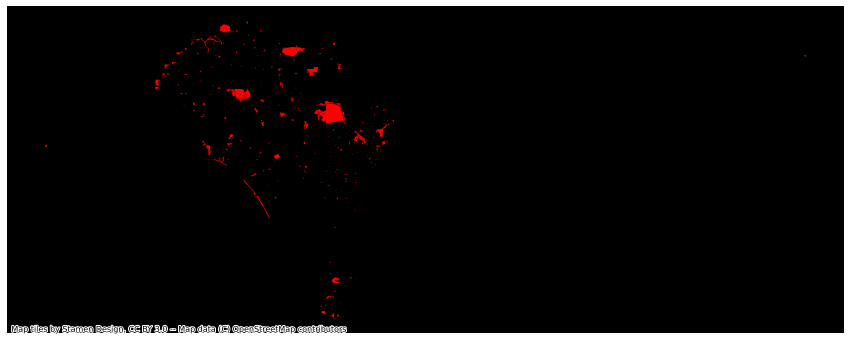

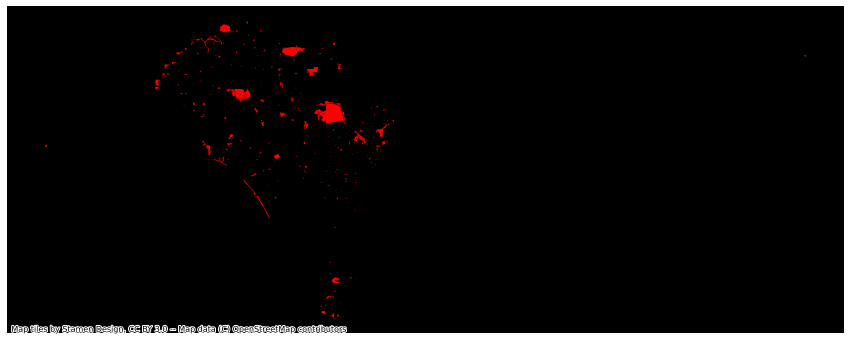

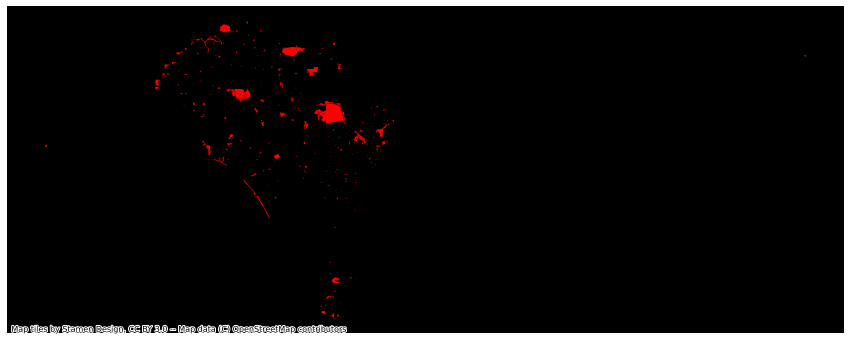

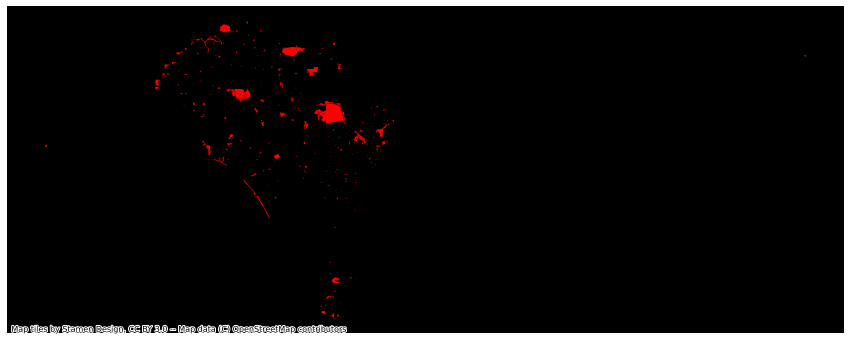

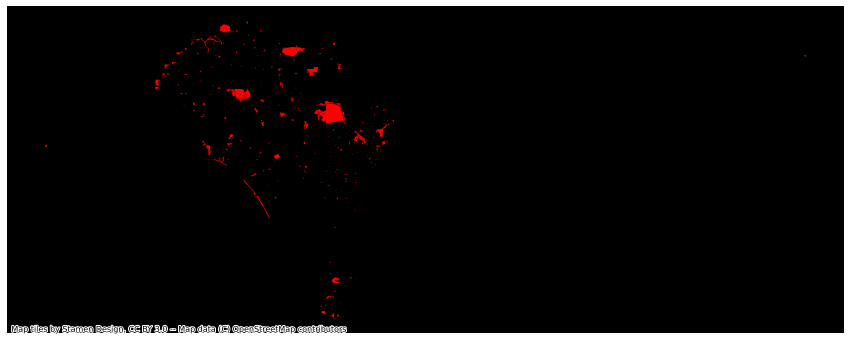

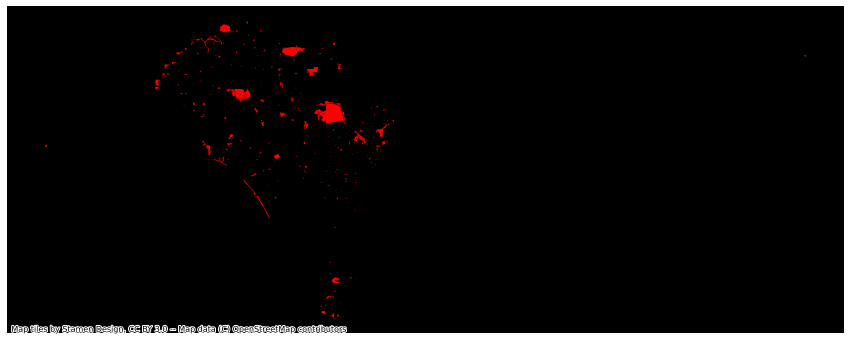

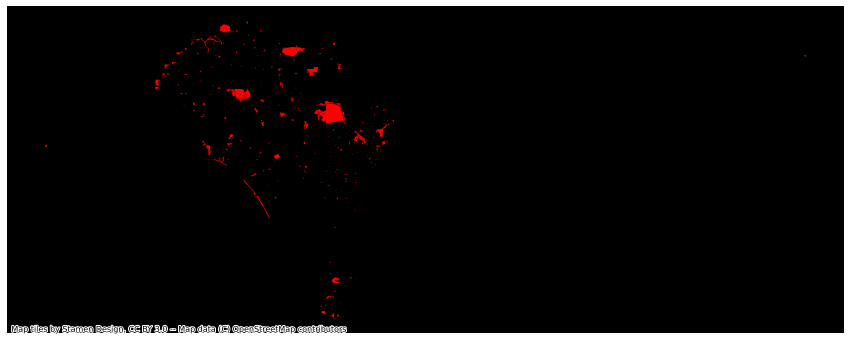

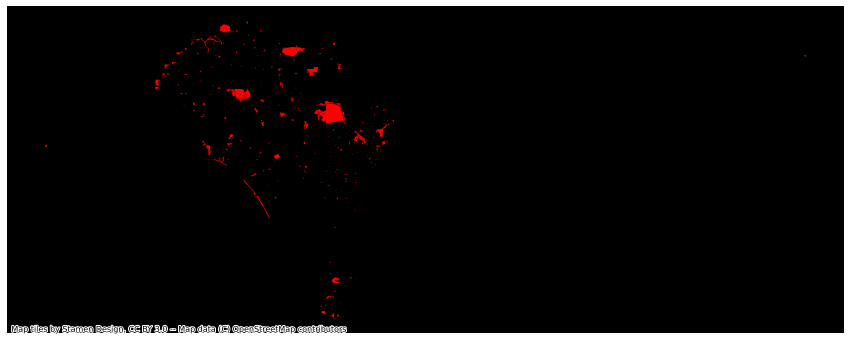

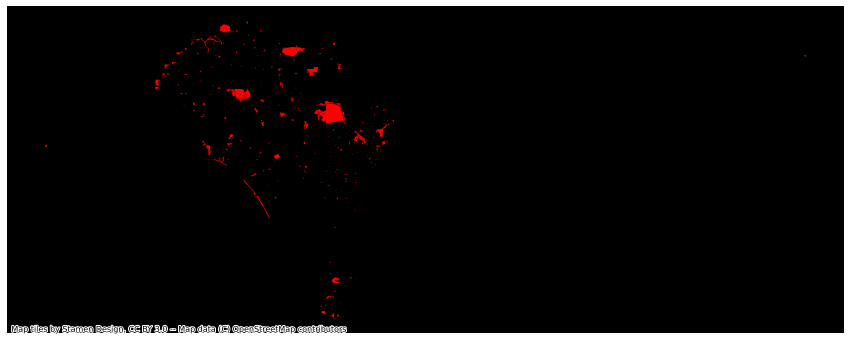

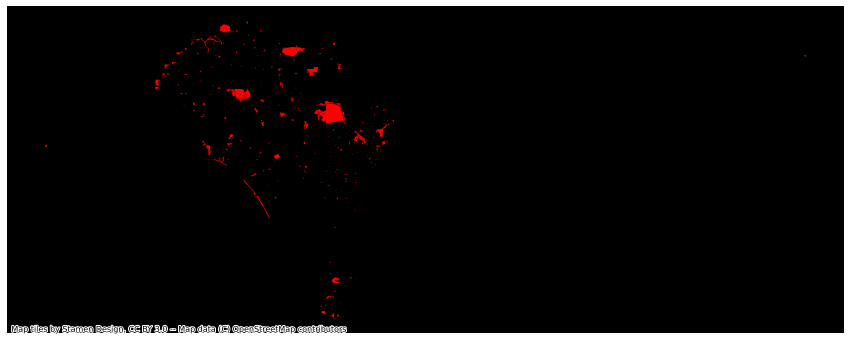

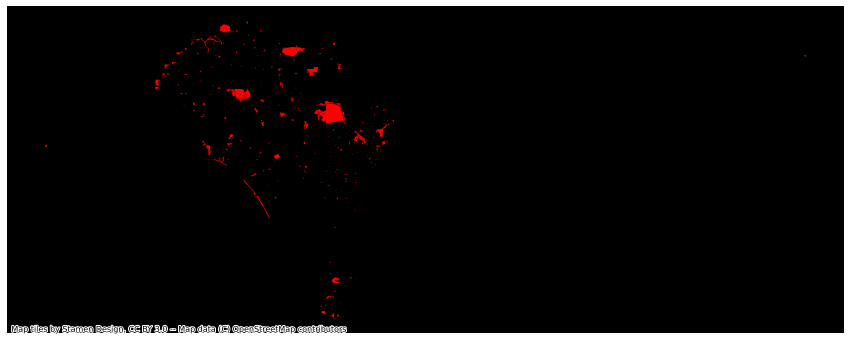

In [12]:
  
for district in districts:
    # map it
    fig, ax = plt.subplots(figsize=(15,15))

    parks.plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='red')

    ax.axis('off')

    ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, zoom=13)

In [13]:
def parkdistrict_map(cd_real='01'):
    fig, ax = plt.subplots(figsize=(12,12))

    # add the layer with ax=ax in the argument 
    parks_mercator.plot(ax=ax,
                        color="darkgreen"
                       )

    # turn the axis off but set custom axes
    ax.axis('off')
    ax.set_ylim([3985000, 4075000])
    ax.set_xlim([-13215000, -13150000])

    # add a basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

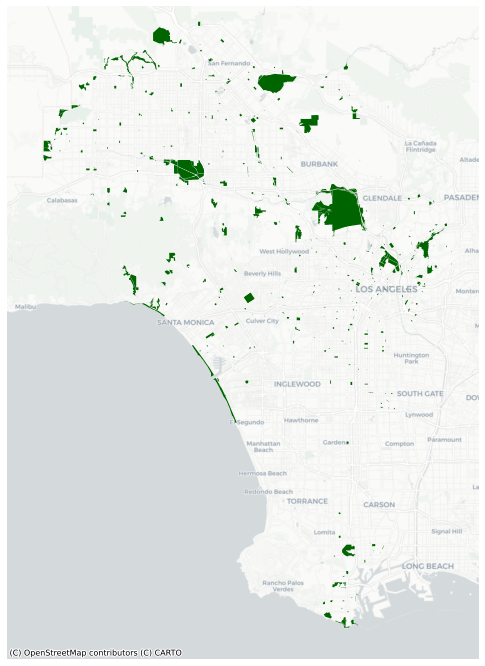

In [14]:
parkdistrict_map(cd_real='02')

# I call this section, the "Boulevard of Broken Code"
Attempts #104 through #1,586

In [15]:
# bring in neighborhood data
neighborhoods = gpd.read_file("https://data.lacounty.gov/api/geospatial/g4rb-en2z?method=export&format=GeoJSON")

<AxesSubplot:>

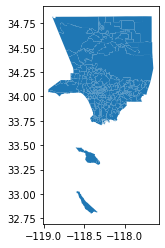

In [16]:
# take a more general look at the data
neighborhoods.plot()

In [17]:
# join the parks data with this neighborhood data
parks_by_neighborhood = gpd.sjoin(neighborhoods, parks) #Spatial join
parks_by_neighborhood

community   source                          label city_type  \
2    Harvard Heights  LA City  Los Angeles - Harvard Heights      City   
4      Beverly Crest  LA City    Los Angeles - Beverly Crest      City   
4      Beverly Crest  LA City    Los Angeles - Beverly Crest      City   
4      Beverly Crest  LA City    Los Angeles - Beverly Crest      City   
4      Beverly Crest  LA City    Los Angeles - Beverly Crest      City   
..               ...      ...                            ...       ...   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   
346       West Hills  LA City       Los Angeles - West Hills      City   
347             None      BOS                City of Burbank      City   

    objectid_left        lcity      shape_stlength        shape_starea  \
2              95  Los Angeles  21077.385705038188   20898421.74609375   
4              55  Los Angeles  110820.54850926602  234233281.15039063   
4              55  Los Angeles  110820.54850926602  234233281.15039063   
4              55  Los Angeles  110820.54850926602  234233281.15039063   
4              55  Los Angeles  110820.54850926602  234233281.15039063   
..            ...          ...                 ...                 ...   
346           174  Los Angeles  105989.43541216178  278714351.12011719   
346           174  Los Angeles  105989.43541216178  278714351.12011719   
346           174  Los Angeles  105989.43541216178  278714351.12011719   
346           174  Los Angeles  105989.43541216178  278714351.12011719   
347            12      Burbank  102151.39667725106   483502845.6328125   

                                              geometry  index_right  ...  \
2    MULTIPOLYGON (((-118.29156 34.04000, -118.2923...          197  ...   
4    MULTIPOLYGON (((-118.40751 34.12945, -118.4074...           39  ...   
4    MULTIPOLYGON (((-118.40751 34.12945, -118.4074...           50  ...   
4    MULTIPOLYGON (((-118.40751 34.12945, -118.4074...          163  ...   
4    MULTIPOLYGON (((-118.40751 34.12945, -118.4074...          370  ...   
..                                                 ...          ...  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          209  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...           56  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          541  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          339  ...   
347  MULTIPOLYGON (((-118.30780 34.16116, -118.3080...          392  ...   

                            name_alpha     shape_leng      area_acres  \
2          NORMANDIE RECREATION CENTER  1575.55772808   3.27155060469   
4                    BEVERLY GLEN PARK  11696.4216578   85.7365179931   
4                       BRIARWOOD PARK  3615.59298078   10.7528414931   
4                   LAUREL CANYON PARK  4249.12451012   23.4448373836   
4               LAUREL CANYON DOG PARK  1867.49596557   3.93713736085   
..                                 ...            ...             ...   
346  ORCUTT RANCH HORTICULTURAL CENTER  4861.94095708   24.0958827354   
346                         CHASE PARK  2071.63332519   5.96554681766   
346                     FALLBROOK PARK  451.020804868  0.298586515384   
346               CHATSWORTH OAKS PARK  1621.82348325   2.90304945512   
347                   BUENA VISTA PARK   6974.5619155   8.71039672028   

    issubpark region                                            address  \
2           N      M                     1550 S Normandie Ave, LA 90006   
4           N      W                         2448 N Angelo Dr, LA 90077   
4           N      W                         461 N Almaden Ct, LA 90077   
4           N      V                     8260 W Mulholland Dr, LA 90046   
4           Y      V                     8260 W Mulholland Dr, LA 90

In [18]:
# count the number of records per community
park_counts = parks_by_neighborhood.value_counts('community').reset_index(name='park_count')
park_counts

community  park_count
0          San Pedro          23
1          Los Feliz          21
2             Encino          18
3         West Hills          17
4             Venice          16
..               ...         ...
118     Reseda Ranch           1
119  Reynier Village           1
120     Shadow Hills           1
121  St Elmo Village           1
122         Mid-city           1

[123 rows x 2 columns]

In [19]:
for index, row in parks_by_neighborhood.iterrows():
    print('There are ' + str(park_counts ['park_count']) + ' parks in ' + str(park_counts ['community']))

There are 0      23
1      21
2      18
3      17
4      16
       ..
118     1
119     1
120     1
121     1
122     1
Name: park_count, Length: 123, dtype: int64 parks in 0            San Pedro
1            Los Feliz
2               Encino
3           West Hills
4               Venice
            ...       
118       Reseda Ranch
119    Reynier Village
120       Shadow Hills
121    St Elmo Village
122           Mid-city
Name: community, Length: 123, dtype: object
There are 0      23
1      21
2      18
3      17
4      16
       ..
118     1
119     1
120     1
121     1
122     1
Name: park_count, Length: 123, dtype: int64 parks in 0            San Pedro
1            Los Feliz
2               Encino
3           West Hills
4               Venice
            ...       
118       Reseda Ranch
119    Reynier Village
120       Shadow Hills
121    St Elmo Village
122           Mid-city
Name: community, Length: 123, dtype: object
There are 0      23
1      21
2      18
3      17
4      16


In [20]:
neighborhoods.community.unique().tolist()

[None,
 'Harvard Heights',
 'Westfield/Academy Hills',
 'Beverly Crest',
 'Hawthorne',
 'Walnut Park',
 'Porter Ranch',
 'West Carson',
 'Cadillac-Corning',
 'Florence-Firestone',
 'San Pasqual',
 'Pacoima',
 'Van Nuys',
 'Valinda',
 'University Park',
 'Vermont Vista',
 'Santa Catalina Island',
 'Encino',
 'Green Meadows',
 'East Hollywood',
 'Century City',
 'Toluca Lake',
 'Athens Village',
 'Northridge',
 'West Vernon',
 'Desert View Highlands',
 'Palms',
 'Del Rey',
 'Hyde Park',
 'Sun Village',
 'West Whittier/Los Nietos',
 'Rancho Park',
 'Harbor City',
 'Cloverdale/Cochran',
 'University Hills',
 'El Monte',
 'Valley Village',
 'Vermont Square',
 'Mission Hills',
 'Wiseburn',
 'Cerritos',
 'Hi Vista',
 'Miracle Mile',
 'Arleta',
 'Little Tokyo',
 'South El Monte',
 'Lakeview Terrace',
 'El Camino Village',
 'Temple-Beaudry',
 'Brookside',
 'Hollywood',
 'Elizabeth Lake',
 'Mandeville Canyon',
 'Harvard Park',
 'San Jose Hills',
 'Westlake',
 'South Park',
 'Koreatown',
 'Rancho

In [21]:
neighborhoods_webmercator = neighborhoods.to_crs(epsg=3857)

def park_by_neighborhood (community='Eagle Rock'):
    
    print("There are X parks in the X neighborhood.")

neighborhoods_webmercator.plot(ax=ax,
                   column='community'
                  )


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

From the above maps and analysis, it's clear that LA is a relatively park poor city. There's unevenness across the city in terms of provision. A closer at individual parks and their amenities would add another layer of complexity to our research question, which we may look at for the final.

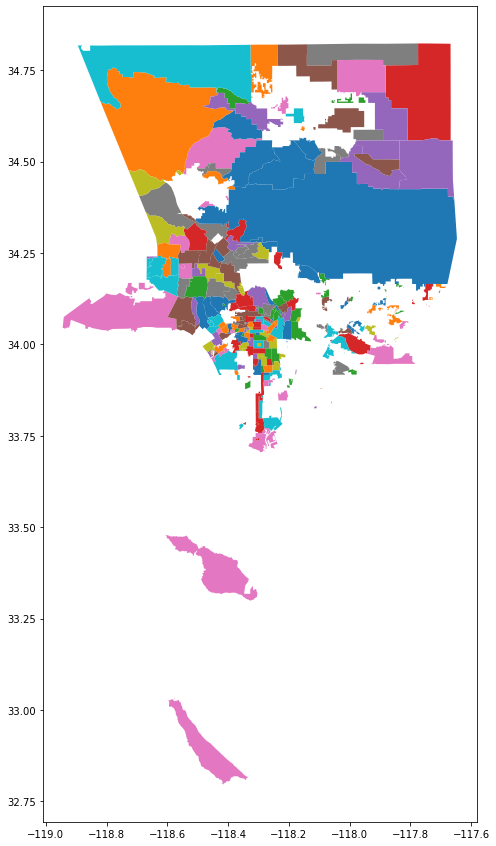

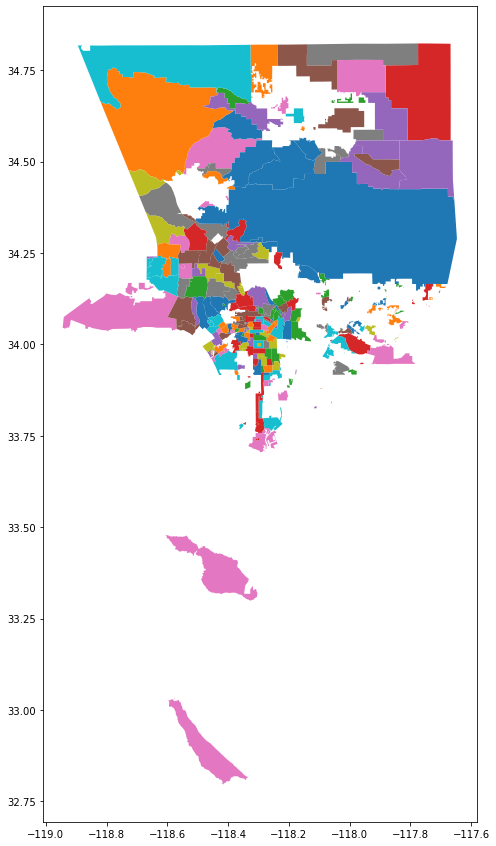

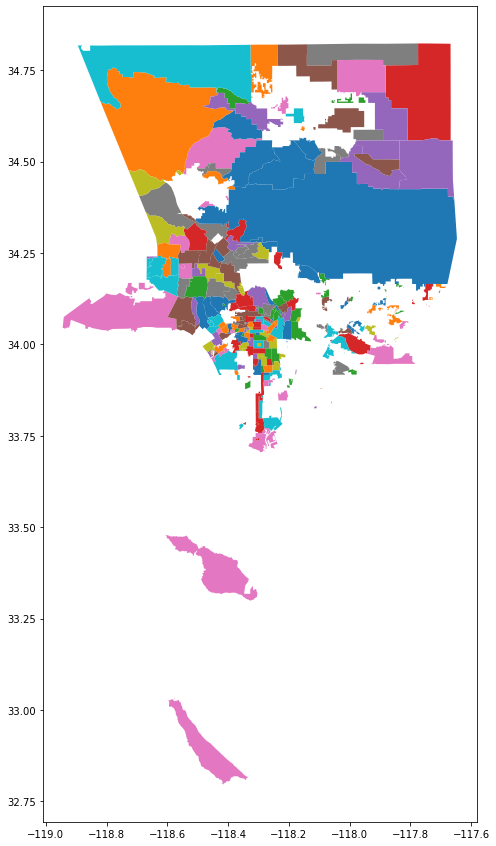

In [22]:
# function
def parks_by_neighborhood(community):

    fig,ax = plt.subplots(figsize=(15,15))

    neighborhoods.plot(ax=ax,
                   column='community'
                  )

# list of neighborhoods
neighbors = ['Harvard Heights', 'Beverly Crest', 'West Hills']

# call the function with a loop
for neighbor in neighbors:
    parks_by_neighborhood(community=neighbors)

In [23]:
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   community       261 non-null    object  
 1   source          348 non-null    object  
 2   label           348 non-null    object  
 3   city_type       348 non-null    object  
 4   objectid        348 non-null    object  
 5   lcity           348 non-null    object  
 6   shape_stlength  348 non-null    object  
 7   shape_starea    348 non-null    object  
 8   geometry        348 non-null    geometry
dtypes: geometry(1), object(8)
memory usage: 24.6+ KB


In [24]:
neighborhoods.community.unique()

array([None, 'Harvard Heights', 'Westfield/Academy Hills',
       'Beverly Crest', 'Hawthorne', 'Walnut Park', 'Porter Ranch',
       'West Carson', 'Cadillac-Corning', 'Florence-Firestone',
       'San Pasqual', 'Pacoima', 'Van Nuys', 'Valinda', 'University Park',
       'Vermont Vista', 'Santa Catalina Island', 'Encino',
       'Green Meadows', 'East Hollywood', 'Century City', 'Toluca Lake',
       'Athens Village', 'Northridge', 'West Vernon',
       'Desert View Highlands', 'Palms', 'Del Rey', 'Hyde Park',
       'Sun Village', 'West Whittier/Los Nietos', 'Rancho Park',
       'Harbor City', 'Cloverdale/Cochran', 'University Hills',
       'El Monte', 'Valley Village', 'Vermont Square', 'Mission Hills',
       'Wiseburn', 'Cerritos', 'Hi Vista', 'Miracle Mile', 'Arleta',
       'Little Tokyo', 'South El Monte', 'Lakeview Terrace',
       'El Camino Village', 'Temple-Beaudry', 'Brookside', 'Hollywood',
       'Elizabeth Lake', 'Mandeville Canyon', 'Harvard Park',
       'San Jose H

NameError: name 'hhinc_mercator' is not defined

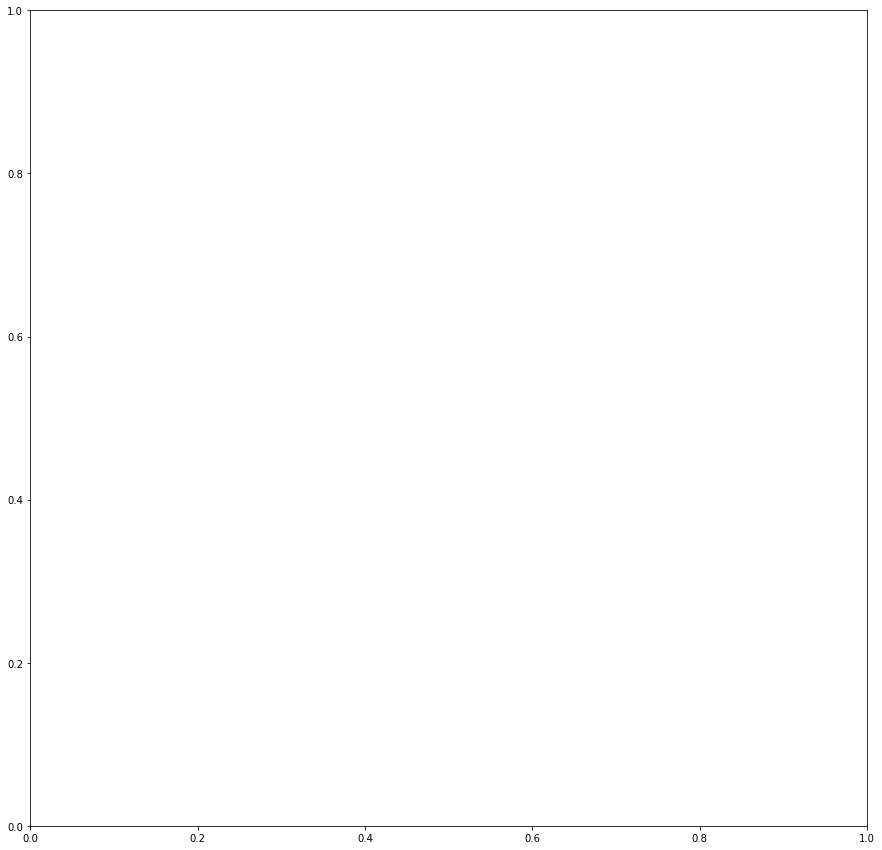

In [25]:
# map it
fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
hhinc_mercator.plot(ax=ax,
                  color="mediumaquamarine",
                  alpha=0.8,
                    edgecolor="black"
                 )

hhinc_merc.plot(ax=ax,
                color="darkorange",
                alpha=0.7,
                edgecolor="black"
               )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with Highest and Lowest Median Household Income',fontsize=22,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)